In [40]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  app.launch_new_instance()
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  app.launch_new_instance()


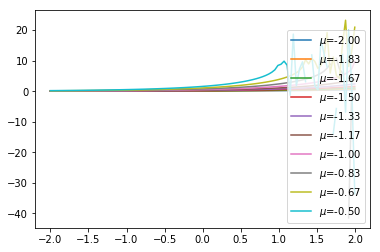

In [38]:
"""解析求 density."""
beta = 1
def anaDensity(q, rkv, mu):
    a = q**2/2 - 2*mu - rkv
    anaDensity = 3*q**2 / (np.exp(beta*a) - 1)
    return anaDensity

Nrkv = 100
rkv = np.linspace(-2, 2, Nrkv)
density = np.zeros(Nrkv)

Nmu = 10
mu = np.linspace(-2, -.5, Nmu)
for j in range(Nmu):
    for i in range(Nrkv):
        density[i], err = integrate.quad(lambda x:anaDensity(x, rkv[i], mu[j]), 0, 3, epsabs=1e-1) 
    plt.plot(rkv, density, label=r'$\mu$=%.2f'%mu[j])

plt.legend()    
plt.show()


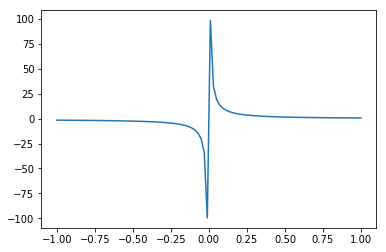

(-0.9999999999999849, None) (1.5016091668706988e-14, None)


In [51]:

x = np.linspace(-1, 1, 100)
y = 1/(np.exp(x) - 1)
plt.plot(x, y)
plt.show()
a = integrate.fixed_quad(lambda x:1/(np.exp(x) - 1), -1, 1, n=200)
b = integrate.fixed_quad(lambda x:1/(x), -1, 1, n=100)
print(a, b)

In [55]:
integrate.fixed_quad(lambda x:1/(-1 + np.exp(-1 + x**2/2)), 0, 100, n=10)

(-24.094076411340616, None)

In [69]:
ze = 1e-10
n = 10000
a, err = integrate.fixed_quad(lambda x:1/(-1 + np.exp(-1 + x**2/2)), 0, np.sqrt(2)-ze, n=n)
b, err = integrate.fixed_quad(lambda x:1/(-1 + np.exp(-1 + x**2/2)), np.sqrt(2)+ze, 100, n=n)
print(a+b)

-5.096223037638362


In [81]:
ze = 1e-10
n = 10
epsabs = 1e-3
a, err = integrate.quad(lambda x:1/(-1 + np.exp(-1 + x**2/2)), 0, np.sqrt(2)-ze, epsabs=epsabs)
b, err = integrate.quad(lambda x:1/(-1 + np.exp(-1 + x**2/2)), np.sqrt(2)+ze, 10, epsabs=epsabs)
print(a+b)
print(err)

-2.104826775024325
7.527570497305527e-05
